POS tags - process of assigning different labels 

Two Type : 
 1. Universal POS Tags : ADJ, Noun
 2. Deatils POS tags : Language-specific
    Americans(NNPS), Google( NNP)

In below example     token.pos_ --> universal tag</br>
                     token.tag_ --> deatiled tag


# Using Spacy's Matcher

In [57]:
import spacy
text = "With great power comes great responsibility"

nlp = spacy.load('en_core_web_sm')

doc = nlp(text)

for token in doc:
  print(token.text , "==>", token.pos_, "==>" , token.tag_, "==>" , token.dep_)

With ==> ADP ==> IN ==> prep
great ==> ADJ ==> JJ ==> amod
power ==> NOUN ==> NN ==> nsubj
comes ==> VERB ==> VBZ ==> ROOT
great ==> ADJ ==> JJ ==> amod
responsibility ==> NOUN ==> NN ==> nsubj


In [58]:
[token for token in doc if token.pos_ == "NOUN"]

[power, responsibility]

In [59]:
for token in doc:
  print(token.text , "==>", token.children)

With ==> <generator object at 0x7f864c345c30>
great ==> <generator object at 0x7f864c345c30>
power ==> <generator object at 0x7f864c345c30>
comes ==> <generator object at 0x7f864c345c30>
great ==> <generator object at 0x7f864c345c30>
responsibility ==> <generator object at 0x7f864c345c30>


In [60]:
for token in doc:
  print(token.text , "==>", [tc.text for tc in token.children])

With ==> []
great ==> []
power ==> ['great']
comes ==> ['With', 'power', 'responsibility']
great ==> []
responsibility ==> ['great']


In [61]:
for token in doc:
  print(token.text , "==>", token.n_lefts, "==>", token.rights)

With ==> 0 ==> <generator object at 0x7f864d409d70>
great ==> 0 ==> <generator object at 0x7f864d409d70>
power ==> 1 ==> <generator object at 0x7f864d409d70>
comes ==> 2 ==> <generator object at 0x7f864d409d70>
great ==> 0 ==> <generator object at 0x7f864d409d70>
responsibility ==> 1 ==> <generator object at 0x7f864d409d70>


In [62]:
for token in doc:
  print(token.text , "==>", token.n_lefts, "==>", [left for left in token.lefts])

With ==> 0 ==> []
great ==> 0 ==> []
power ==> 1 ==> [great]
comes ==> 2 ==> [With, power]
great ==> 0 ==> []
responsibility ==> 1 ==> [great]


In [63]:
from spacy import displacy
displacy.render(doc, jupyter=True)

NER- Process of finding named entities from a given text.</br>
Two steps:-</br>
------Name Entity Extraction</br>
------Named Entity Classification</br>

Classifications : assigning classes to named entities.</br></br>

Linking approaches:   </br>
------Domain Dictionary Lookup(Ontologies)</br>
------Knowledge Based : Wikipedia, Google API</br>
------APIs - Google Map, News API</br>

In [64]:
text="the latest revival from the carefree early 00s to brave the fire-scorched hellscape of the 21st century. The relationship between Ben Affleck and Jennifer Lopez, AKA Bennifer, has roared back with a vengeance"
doc = nlp(text)

In [65]:
for token in doc.ents:
  print(token.text , "==>", token.start_char, "==>", token.end_char, "==>", token.label_)

early 00s ==> 37 ==> 46 ==> DATE
the 21st century ==> 87 ==> 103 ==> DATE
Ben Affleck ==> 130 ==> 141 ==> PERSON
Jennifer Lopez ==> 146 ==> 160 ==> PERSON
AKA Bennifer ==> 162 ==> 174 ==> ORG


In [66]:
from spacy import displacy
displacy.render(doc, style='ent',jupyter=True)

# Pattern 2: X and/or other Y



---------------------------------------------------------------
Rule-based Relation Extraction
Uses a lot of hand-written patterns for extracting information from the natural language text.

Automatic Acquisition of Hyponyms from Large Text Corpora

Marti Hearst built a set of text-patterns that can be used for extracting meaningful information from text. These patterns are known as Hearst Patterns. These are lexico-syntactic patterns used to recognize hyponymy. For example,


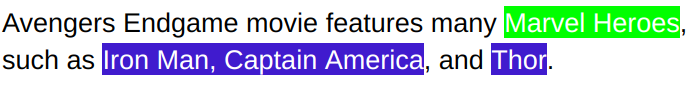
Here, "Marvel Heroes" is a hypernym and "Iron Man", "Captain America", and "Thor" are hyponyms. 

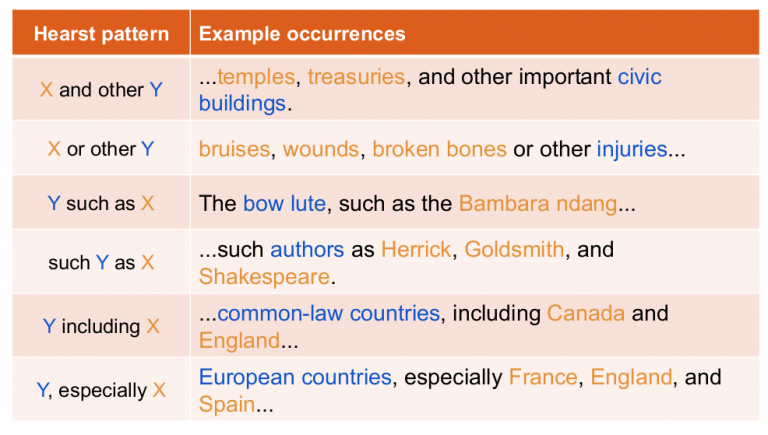

**Relation Extraction**:  Process of extracting relational triplet from natural language text.</br>

Type of Relations Extraction :      

---


 1. Rule Based Realtion extraction:</br>
      a. Hand crafted Pattern</br>
      b. High Precision </br>
      c. Low Recall</br>

  2. Supervised Relation Extraction </br>
      a. **Need lof of Labelled data**</br>
      b. Detect if relation exist </br>
      c. Expensive to label</br>


  3.  Semi Supervised relation extraction </br>

      a. **Iterative process**</br>
      b. Extract relation from text </br>
      c. High Recall then rule based extraction </br>
      d. Dont need enough label</br>
      e. Start with set of seeds </br>

  4. Distantly supervised relation </br>

      a. Combines the idea of with seeds with relation</br>
      b. check if entities are present in the sentence </br>
      c. Extract the features and trains a classifiers</br>
      d. Produces noisy annotations and restricted to knowledge base </br>
      **e. Uses the set of tupples ffrom existing knowledge bases like wikki.** </br>

  5. Unsupervised relation extraction(Open relation)</br>
    a. No training data required </br>
    b. extract new relations from the web</br>



In [67]:
import spacy
from spacy.matcher import Matcher
from  spacy import displacy
nlp = spacy.load("en_core_web_sm")

text = "In this way you can disinfect your car and other vehicles. Fruits such as apple.Amid a flurry of diplomatic activity in Moscow and Germany, a fresh wave of civilian deaths were reported across eastern Ukraine as Vladimir Putin’s forces escalated their barrage of key targets on Tuesday and appeared to renege once again on giving safe passage to women and children."
doc = nlp(text)

In [68]:
from typing import Pattern
#Define the pattern 
pattern = [{'POS':'NOUN'}, 
           {'LOWER': 'such'},
           {'LOWER': 'as'}, 
           {'POS': 'NOUN'}]

# Create Matcher Object
matcher=Matcher(nlp.vocab)

# Add the rule to matcher
matcher.add("Pattern X and other Y",None,pattern)

matches = matcher(doc)

# Print extracted text
for match in matches:
  print(doc[match[1]:match[2]])

Fruits such as apple



Drawbacks:</br>
----------Hides implementation details</br>
----------Doesn't work on patterns in which words do not immediately follow each other.</br>----------E.g., Subject + Auxiliary + Verb + ... + Object


***Quantifiers***:</br>

----------    ! - Negation</br>
----------    ? - Optional</br>
----------    + - 1 or more</br>
----------    * - 0 or more</br>


**Pattern: NOUN + and/or + other + NOUN**


In [69]:
#Define the pattern 
pattern = [{'POS':'NOUN'}, 
           {'LOWER': 'and','OP':'?'},  #optional
           {'LOWER':'or','OP':'?'},    #optional
           {'LOWER': 'other'}, 
           {'POS': 'NOUN'}]
# Add the rule to matcher
matcher.add("Pattern X and/or Y",None,pattern)

# Create Matcher Object
matcher=Matcher(nlp.vocab)

# Add the rule to matcher
matcher.add("Pattern X and/or other Y",None,pattern)

matches = matcher(doc)

# Print extracted text
for match in matches:
  print(doc[match[1]:match[2]])

car and other vehicles


# Pattern 3 : X going Y

In [86]:
doc = nlp("John is going to Berlin to go")
displacy.render(doc, style='dep', jupyter=True)

In [89]:
# Function for extracting the relation
def x_going_y(doc):
  # Proceed if at least 3 words are present
  if len(doc)>=3:
    matches=[]

    for i in range(len(doc)):
      x=''
      y=''
      #print(doc[i].dep_)
      # Checking if the root word is going
      if ((doc[i].dep_=='ROOT') and (doc[i].text=='going')):
        # Accessing subtree

        for token in doc[i].subtree:
          # Checking if token is subject
          if token.dep_.startswith('nsubj'):
            x=token.text
          # Checking if token is object
          if token.dep_.endswith('obj'):
            y=token.text
        # Appending the triple into list
        matches.append((x,doc[i].text,y))
    return matches
  return []

In [90]:
x_going_y(doc)

nsubj
aux
ROOT
prep
pobj
aux
advcl


[('John', 'going', 'Berlin')]

In [78]:
x_going_y(nlp('Sam was going on vacation to Mumbai. But, the train was going to Goa.'))

[('Sam', 'going', 'Mumbai'), ('train', 'going', 'Goa')]

Hearst patterns are used for extracting the hyperym-hyponym relationdhips from the natural langauge text.